#영화 관객수 예측
# 변수들
* title : 영화의 제목 object =>**drop** 
* distributor : 배급사 object => categorical **(독점 배급사 5개 +기타 or 4개  +기타)**


* genre : 장르 object => categorical **그대로(좋은 변수인 듯)**
* screening_rat : 상영등급 object =>categorical
**(둘다 유지)**

* release_time : 개봉일 object => month categorical || season categorical **(peak/ non peak)**

* time : 상영시간(분) 

* director : 감독이름 object *=> categorical??인지 아닌지 모르겠음*(drop)

* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)**(일단 결측치 0으로 채우기)(결측치 median)**

* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외) **(지호님 함수 이용, correlation 확인필요)**

* num_staff : 스텝수

* num_actor : 주연배우수 => drop 해보자 **(가져가도 된다.)**

* box_off_num : 관객수 (target)

https://dacon.io/competitions/open/235536/overview/description

In [ ]:
# 1. 홍성수 데이터 다시 보기
# 2. dir 새 변수 만들면 어떨까

# director 홍성수 * 7 / OOO 0
# + dir_prev_bfnum
# + dir_prev_num
# = dir ability?=> NaN 이랑 0이 너무 많아서 곤란

# 새 변수를 만들때 (titanic 때처럼 가족수, 동행자 수 를 합쳐버린 것은 괜찮은데.. 이건 가중치를 함부로 바꾸기는 조심스러움. 
# 만약 감독과 관객 수와 상관있는 요인을 googling 한다면 가능)

# 목요일까지 뭐하징
# director 변수를 종합해서 => 새로운 dir_movies_num 변수를 만들어서 train test 둘다 적용
# 홍성수 7
# 홍성수 7
# 홍성수 7
# 홍성수 7
# 홍성수 7
# 홍성수 7
# 홍성수 7
# 이렇게 한 후 홍성수 제거

# dir_prev_ 2개 변수에 NaN이랑 0이 너무 많음
# drop 해서 numerical 변수는 2개? 사용하는 셈임.

# Cross Validation은 



#### file

#### train : 모델 학습 및 검증 데이터  - train(cross-validation) + test로 나눠서 학습

#### test : 최종 예측 대상 파일

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 1. Import module

In [ ]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


mpl.rcParams['font.family'] = "Humor-Sans" # window의 경우
mpl.rcParams["axes.unicode_minus"] = False

%matplotlib inline
import seaborn as sns
sns.set(font = "Humor-Sans",
        rc = {"axes.unicode_minus": False},
        style = "darkgrid")
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]


sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold

## 정답은 fm._rebuild()

fm._rebuild() 를 해줘야 system 에 추가 설치된 폰트를 matplotilb.font_manager 가 알아차리는 것으로 보인다. 

In [ ]:
fm._rebuild()

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.12
설정 폰트 글꼴: ['NanumGothic Eco'], 설정 폰트 사이즈: 12.0


##2. Data analysis

In [ ]:
data_path = "/content/drive/Shareddrives/KUBIG 그룹과제/영화 관객수 데이터"
df = pd.read_csv(data_path + "/movies_train.csv")
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:

df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


**column  확인 (EDA)**

칼럼별 내용, 칼럼 categorical vs continuous 구별 - categorical이면 one hot encoding 일요

칼럼 missing data 확인

변수 대상 칼럼 구별(아닌 것들 제거)

데이터별 분포 및 target과의 연관도 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


Missing data: "dir_prev_bfnum" : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

checking missing data

In [ ]:
df.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
df[df["dir_prev_bfnum"].isnull()][["dir_prev_bfnum", "dir_prev_num"]]

,dir_prev_bfnum,dir_prev_num
0,NaN,0
6,NaN,0
8,NaN,0
9,NaN,0
10,NaN,0
...,...,...
593,NaN,0
594,NaN,0
597,NaN,0
598,NaN,0


In [ ]:
df[df["dir_prev_bfnum"].isnull()]["dir_prev_num"].sum()

0

330개의 dir_prev_bfnum은 "dir_prev_num"이 모두 0이기에(전작이 없는 감독), 감독의 전작들 평균 관객수를 계산할 때, 모두 NaN 값으로 반환된다..

따라서 이와같은 경우 전작 평균 관객 수(dir_prev_bfnum)을 모두 0으로 바꿔주어야한다.

인줄 알았으나... 정확히는 데이터 미반영이다.

예를들어 홍상수 감독의 경우,

영화가 많은데.. dir_prev 내용에 이 내용 모두 반영되어야 하는게 맞다.(누적으로)

추후에 새로운 변수로 만들던, 아니면 이 내용을 다시 반영시켜서 데이터를 채우는 것도 좋을 것 같다.


따라서 감독이 해당 영화가 데뷔작이라면 0으로 채우는 것이 맞는데, 나머지는 아니라서 쉽게 0으로 채우는 것은 불가능하다.

In [ ]:
df[df.director == "홍상수"]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
15,자유의 언덕,(주) 영화제작전원사,드라마,2014-09-04,67,청소년 관람불가,홍상수,NaN,0,52,3,39317
19,하하하,스폰지,드라마,2010-05-05,115,청소년 관람불가,홍상수,NaN,0,74,9,57029
115,북촌방향,(주) 영화사조제,드라마,2011-09-08,79,청소년 관람불가,홍상수,NaN,0,55,5,46212
164,지금은맞고그때는틀리다,(주)NEW,드라마,2015-09-24,121,청소년 관람불가,홍상수,39317.0,1,16,2,80734
331,다른나라에서,(주) 영화제작전원사,드라마,2012-05-31,89,청소년 관람불가,홍상수,NaN,0,70,2,31101
506,우리 선희,(주) 영화제작전원사,드라마,2013-09-12,89,청소년 관람불가,홍상수,NaN,0,8,6,69122
523,옥희의 영화,스폰지,드라마,2010-09-16,80,청소년 관람불가,홍상수,NaN,0,57,3,37122


####**numerical data**

In [ ]:
#numerical data
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,96,0.00,0,91,2,23398
1,130,1161602.50,2,387,3,7072501
2,123,220775.25,4,343,4,6959083
3,101,23894.00,2,20,6,217866
4,108,1.00,1,251,2,483387


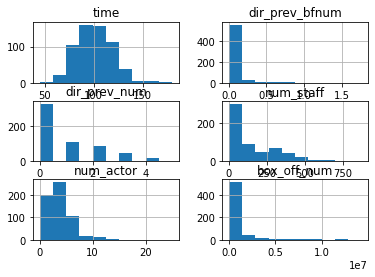

In [ ]:
df_numerical.hist()
plt.show()

In [ ]:
df_numerical.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


<Figure size 1440x360 with 0 Axes>

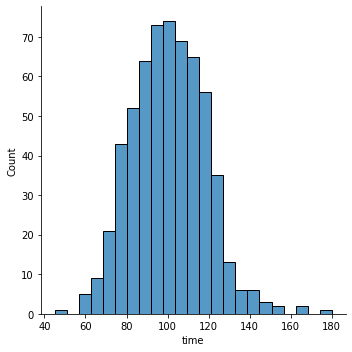

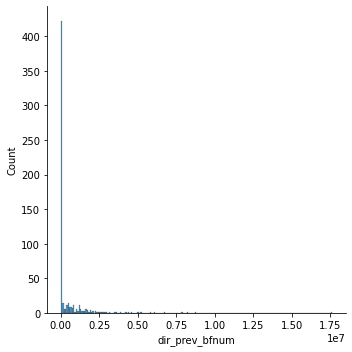

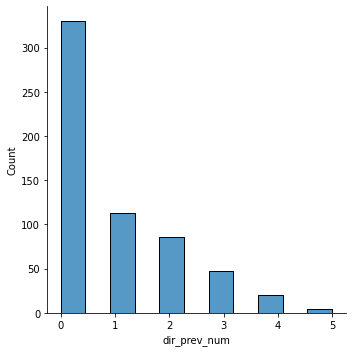

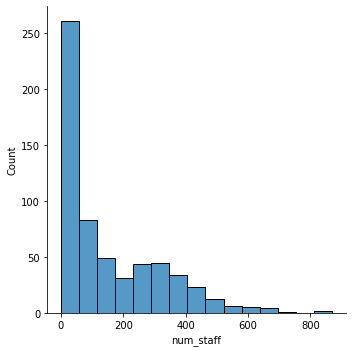

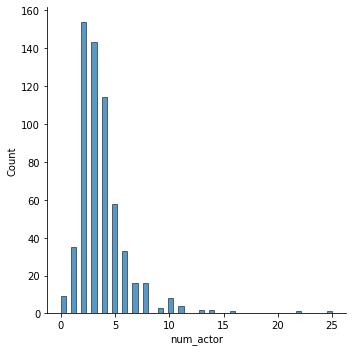

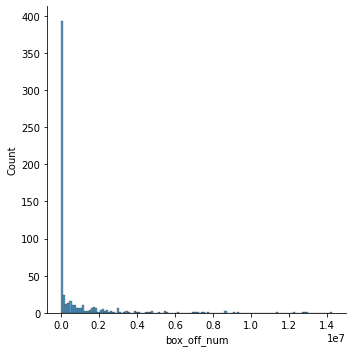

In [ ]:
plt.figure(figsize = (20,5))
for col in list(df_numerical):
  sns.displot(df_numerical[col])

plt.show()

**Q.너무 작은 값들로 튀는 경우는 어떻게 처리를 하는 게 좋을까?**

####**Multivariable correlation**

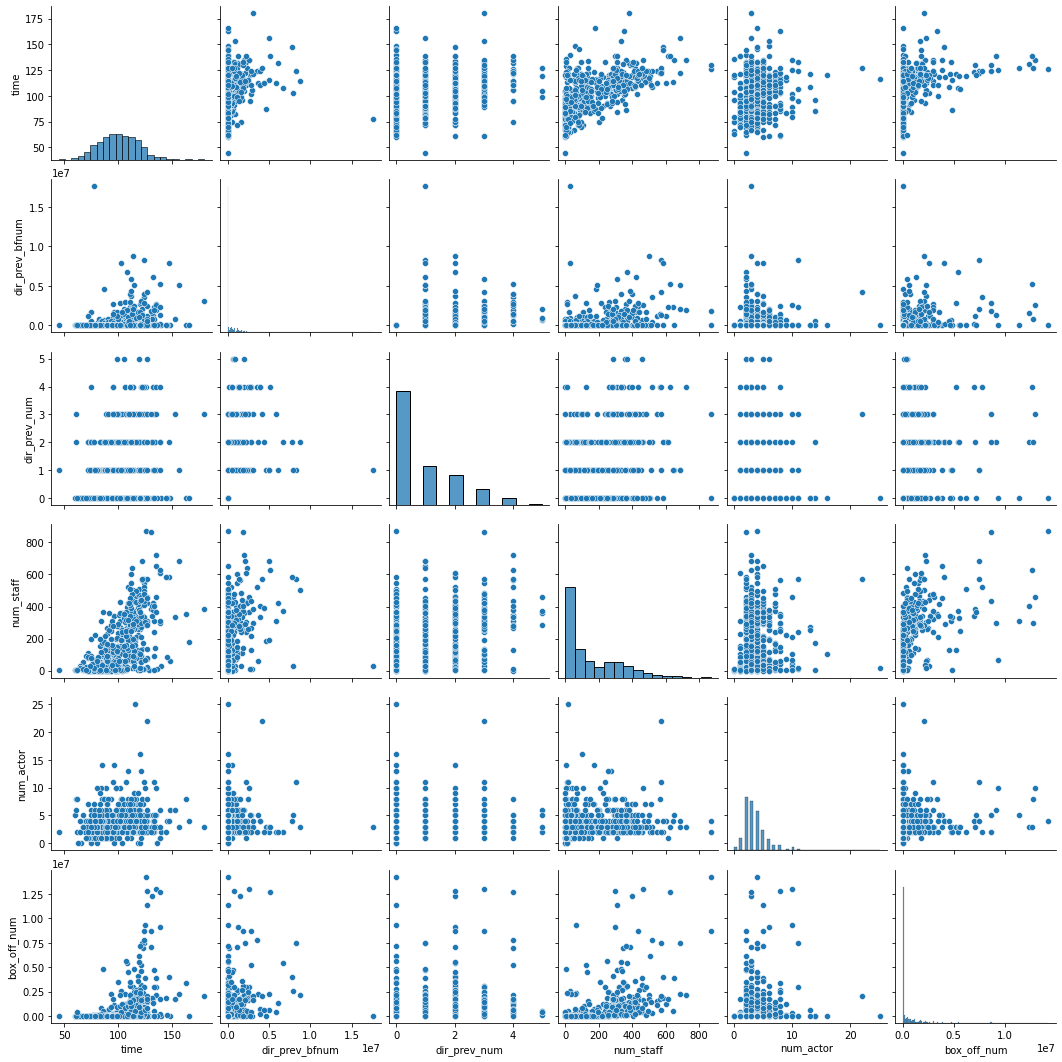

In [ ]:
sns.pairplot(df_numerical)
plt.show()

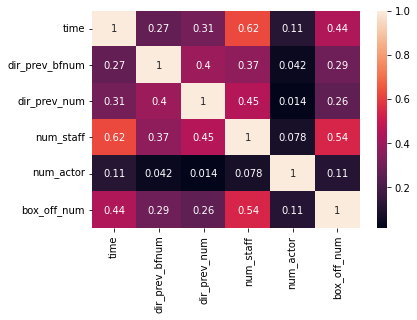

In [ ]:
corr = df_numerical.corr()
sns.heatmap(corr, annot = True)
plt.show()

Numerical 변수간 correlation은 없어 보인다.

In [ ]:
corr["box_off_num"].sort_values(ascending = False)

box_off_num       1.000000
num_staff         0.544265
time              0.441452
dir_prev_bfnum    0.293791
dir_prev_num      0.259674
num_actor         0.111179
Name: box_off_num, dtype: float64

**Q.target variable인 "box_off_num"과의 correlation이 낮은 변수들 처리는 어떻게?"**

생각보다 연관도가 낮은 변수들이 많으나, feature을 너무 줄이다보면 prediction이 안될수도..

###**Categorical data**

In [ ]:
df_cat = df.select_dtypes(include = "object")
df_cat.head()

,title,distributor,genre,release_time,screening_rat,director
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,청소년 관람불가,조병옥
1,내부자들,(주)쇼박스,느와르,2015-11-19,청소년 관람불가,우민호
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,15세 관람가,장철수
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,전체 관람가,구자홍
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,15세 관람가,신근호


In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          600 non-null    object
 1   distributor    600 non-null    object
 2   genre          600 non-null    object
 3   release_time   600 non-null    object
 4   screening_rat  600 non-null    object
 5   director       600 non-null    object
dtypes: object(6)
memory usage: 28.2+ KB


categorical 변수별 데이터 종류 개수 확인

In [ ]:
for col in list(df_cat.columns):
  print(col, ":", len(df_cat[col].unique()))


title : 600
distributor : 169
genre : 12
release_time : 330
screening_rat : 4
director : 472


변수 종류 개수가 너무 많은 title 제외

director은 나중에 dir_prev 변수 2개와 합치든 말든

일단은 영화 제작 총 편수로 대체한다.




In [ ]:
df_cat["distributor"].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

distributor : 상위 5개 배급사 + 나머지 로 해서 dummy 변수로

In [ ]:
df_cat["genre"].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

genre: one hot encoding

In [ ]:
df_cat["screening_rat"].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

screening_rat : dummy 변수 생성



In [ ]:
df_cat["release_time"]

0      2012-11-22
1      2015-11-19
2      2013-06-05
3      2012-07-12
4      2010-11-04
          ...    
595    2014-08-13
596    2013-03-14
597    2010-09-30
598    2015-05-14
599    2013-01-30
Name: release_time, Length: 600, dtype: object

release time을 년, 월, 일로 나눠서 생각해보기

release 월을 다시 계절 categorical로 바꾸기

In [ ]:
def release_time(x):
  return str(x).split("-")
  


df["release_year"] = df["release_time"].map(lambda x : int(release_time(x)[0]))
df["release_month"] = df["release_time"].map(lambda x : int(release_time(x)[1]))
df["release_day"] = df["release_time"].map(lambda x : int(release_time(x)[2]))
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012,11,22
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11,19
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6,5
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7,12
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11,4


In [ ]:
df["release_year"].value_counts()

2014    127
2015    120
2013     95
2010     90
2012     88
2011     80
Name: release_year, dtype: int64

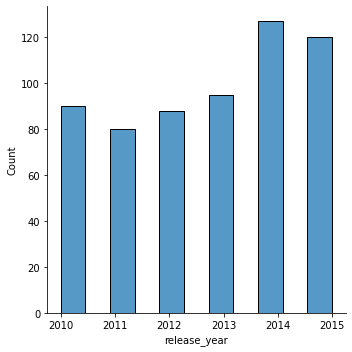

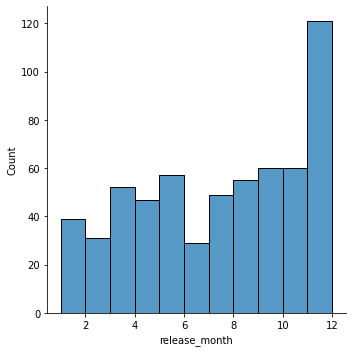

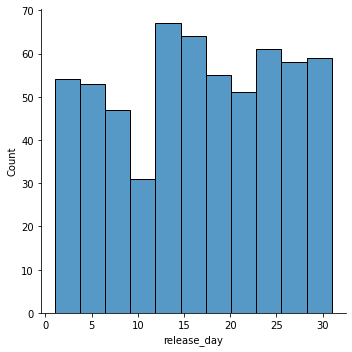

In [ ]:
for col in ["release_year", "release_month", "release_day"]:
  sns.displot(df[col])

release_time : 년도, 월에 의해 크게 관객수가 영향을 받을 것으로 예상, 

개봉 일자에는 큰 영향 없을 것.(일자는 변수에서 제외)

In [ ]:
df_num = df.select_dtypes(include = ["float64", "int64"])
corr = df_num.corr()
corr["box_off_num"].sort_values(ascending = False)

box_off_num       1.000000
num_staff         0.544265
time              0.441452
dir_prev_bfnum    0.293791
dir_prev_num      0.259674
num_actor         0.111179
release_month     0.019104
release_year     -0.002497
release_day      -0.026700
Name: box_off_num, dtype: float64

실제로는 개봉 연도와 일자와는 target variable과 correlation이 없다고 봐야함.

개봉 월도 사실 correlation이 너무 낮은데, 일단 양수 이므로 예측 변수에 포함

##3.Data Preprocessing

전처리 과정은 모두 train.csv, test.csv 모두 같게 해야한다.


나중에 model에 들어갈 prediction 대상 파일인 test.csv도 같은 방법으로 전처리


In [ ]:
df = pd.read_csv(data_path + "/movies_train.csv")

#dropping
# df.drop(["title", "num_actor", "dir_prev_bfnum", "dir_prev_num"], axis = 1, inplace = True)
df.drop(["title"], axis = 1, inplace = True)


#release time
def release_time(x):
  return str(x).split("-")

df["release_month"] = df["release_time"].map(lambda x : int(release_time(x)[1]))

#release month : season categorical
#spring, summer, falling, winter
# def season(x):
#   if x in [3,4,5]:
#     return "spring"
#   elif x in [6,7,8]:
#     return "summer"
#   elif x in [9,10,11]:
#     return "falling"
#   elif x in [12,1,2]:
#     return "winter"

def season(x):
  if x in [3,4,5,9,10,11]:
    return "non-peak"
  else: 
    return "peak"

df["season"] = df["release_month"].map(lambda x : season(x))
df.drop(["release_time","release_month"], axis =1, inplace = True)






# bins = list(range(0,60, 5)) #5단위
bins = [0,2,8,26,55] #세그룹으로 만들기
# labels = list(range(1, len(bins))) # 구간 나누기
labels = list(map(chr, range(ord("A")+len(bins)-2, ord("A")-1, -1)))
distributors = list(df.distributor.unique())
dis_counts = {}
for dis in distributors:
  dis_counts[dis] = df.distributor.value_counts()[dis]


df["distributor_counts"] = df["distributor"].map(lambda x : dis_counts[x])
df["distributor_group"]  = pd.cut(df.distributor_counts, bins = bins, labels = labels)
df.drop(["distributor", "distributor_counts"], axis = 1, inplace = True)



#director : 제작 영화 개수 dir_movies_num : numerical or categorical?
dir_list = list(df["director"].unique())
dir_movie_num = {}
for dir in dir_list:
  dir_movie_num[dir] = df["director"].value_counts()[dir]

df["dir_movies_num"]  = df["director"].map(lambda x: dir_movie_num[x])
df.drop("director", axis =1, inplace=  True)

bins = [0,1,2,3,4,5,6,7]
labels = list(map(chr, range(ord("A")+len(bins)-2, ord("A")-1, -1)))
df["dir_movies_num"] = pd.cut(df.dir_movies_num, bins = bins, labels = labels)

#일단 0으로 채운다.
df["dir_prev_bfnum"].fillna(df["dir_prev_bfnum"].mean(), inplace=  True)

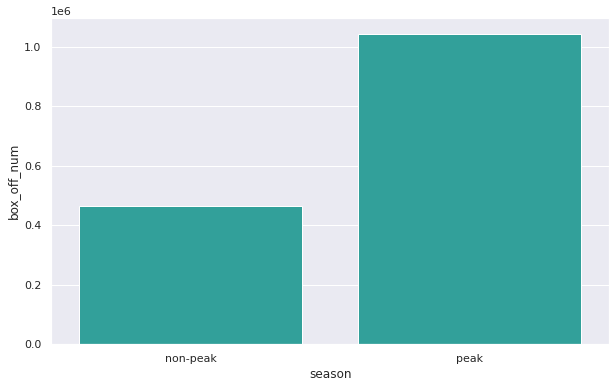

In [ ]:
plt.figure(figsize=(10,6))
mean = df[["season", "box_off_num"]].groupby(['season'], as_index=False).mean()
sns.barplot(x='season', y='box_off_num', data=mean, color="LightSeaGreen")
plt.show()

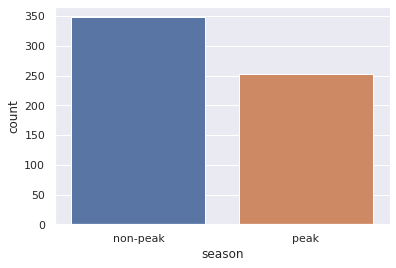

In [ ]:
sns.countplot(df.season)

여름 겨울(성수기)일수록 관객수가 많다.

굳이 여름 겨울 나누지 않고, 성수기 vs 비성수기로 나누어도 괜찮을 것 같다.

[0, 2, 8, 26, 55]


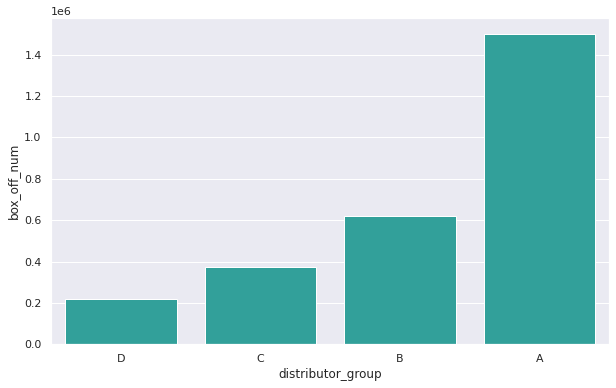

In [ ]:
print(bins)
plt.figure(figsize=(10,6))
mean = df[["distributor_group", "box_off_num"]].groupby(['distributor_group'], as_index=False).mean()
sns.barplot(x='distributor_group', y='box_off_num', data=mean, color="LightSeaGreen")
plt.show()

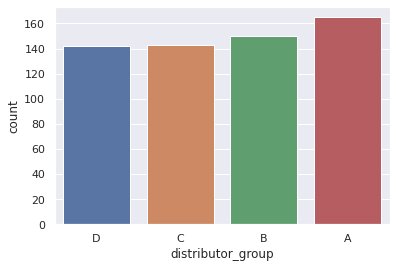

In [ ]:
sns.countplot(df.distributor_group)

독점 배급사에 들어갈수록 성적이 좋다.

영화 데이터 개수를 보고 5단위로 그룹하기보다는

독점일수록 관객 수가 많다는 편향을 보이도록 + 데이터간 개수 차이가 별로 없도록 그룹하는게 좋다.

따라서 세개의 그룹으로 나눴다.

[0, 1, 2, 3, 4, 5, 6, 7]


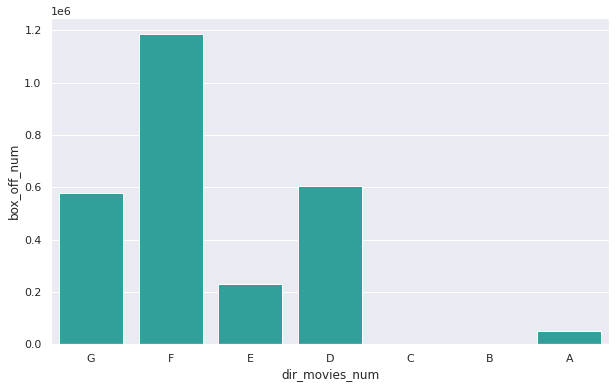

In [ ]:
plt.figure(figsize=(10,6))
print(bins)
mean = df[["dir_movies_num", "box_off_num"]].groupby(["dir_movies_num"], as_index=False).mean()
sns.barplot(x="dir_movies_num", y='box_off_num', data=mean, color="LightSeaGreen")
plt.show()

In [ ]:
df.dir_movies_num.value_counts()

G    373
F    158
E     42
D     20
A      7
C      0
B      0
Name: dir_movies_num, dtype: int64

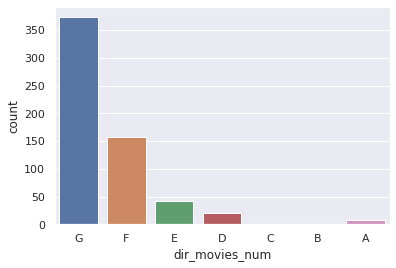

In [ ]:
sns.countplot(df.dir_movies_num)

감독이 영화를 많이 찍었다고 해서 관객수가 많은 경향을 보이진 않는다.

실제 전 실적들이 예상하는데 도움을 줄듯... dir_prev 데이터

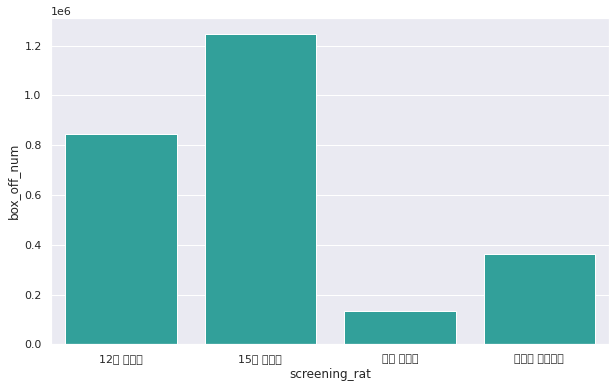

In [ ]:
plt.figure(figsize=(10,6))
mean = df[["screening_rat", "box_off_num"]].groupby(["screening_rat"], as_index=False).mean()
sns.barplot(x="screening_rat", y='box_off_num', data=mean, color="LightSeaGreen")
plt.show()

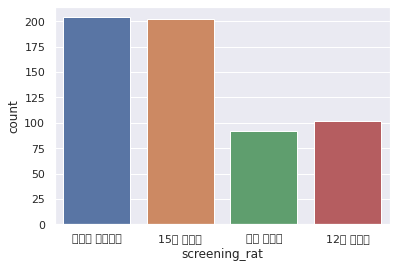

In [ ]:
sns.countplot(df.screening_rat)

이건 그대로 가져가자

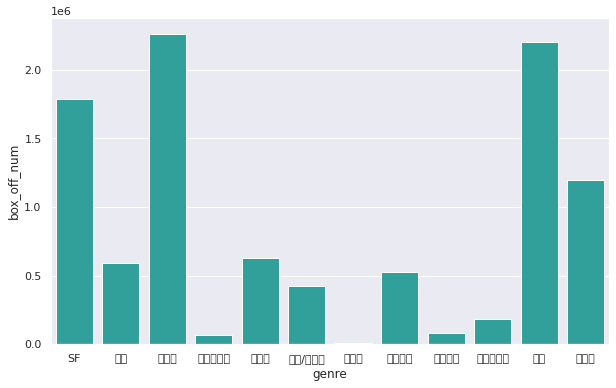

In [ ]:
plt.figure(figsize=(10,6))
mean = df[["genre", "box_off_num"]].groupby(["genre"], as_index=False).mean()
sns.barplot(x="genre", y='box_off_num', data=mean, color="LightSeaGreen")
plt.show()

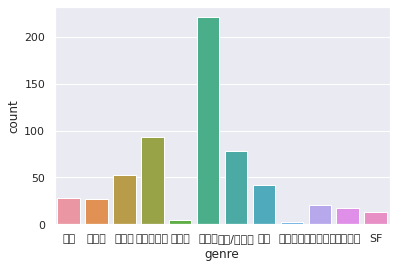

In [ ]:
sns.countplot(df.genre)

In [ ]:
df.genre.value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

이것도 잘 모르겠는데 일단 그냥 가져가자

**dir_prev 데이터 처리하기(결측값)**

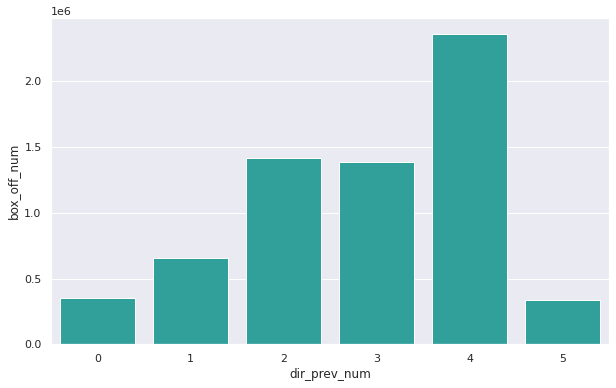

In [ ]:
plt.figure(figsize=(10,6))
mean = df[["dir_prev_num", "box_off_num"]].groupby(["dir_prev_num"], as_index=False).mean()
sns.barplot(x="dir_prev_num", y='box_off_num', data=mean, color="LightSeaGreen")
plt.show()

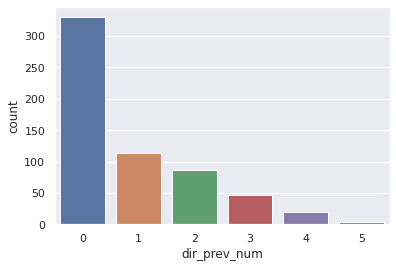

In [ ]:
sns.countplot(df.dir_prev_num)

numerical data 분포도 정규분포로 햇으면 좋겟는데,

time은 정규분포 형태지만

num_staff는 딱히 아니다...

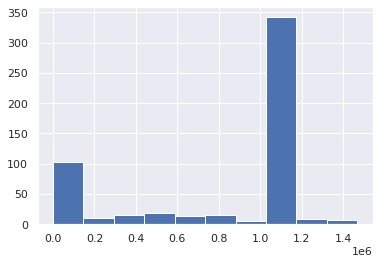

In [ ]:
df[df.dir_prev_bfnum <1500000].dir_prev_bfnum.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe21d344e10>,
      dtype=object)

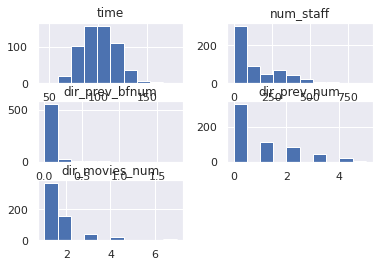

In [ ]:
df[["time","num_staff", "dir_prev_bfnum", 'dir_prev_num', "dir_movies_num"]].hist()

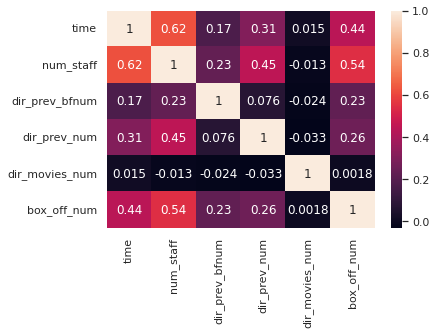

In [ ]:
corr = df[["time","num_staff", "dir_prev_bfnum", 'dir_prev_num',"dir_movies_num",'box_off_num']].corr()
sns.heatmap(corr, annot = True)

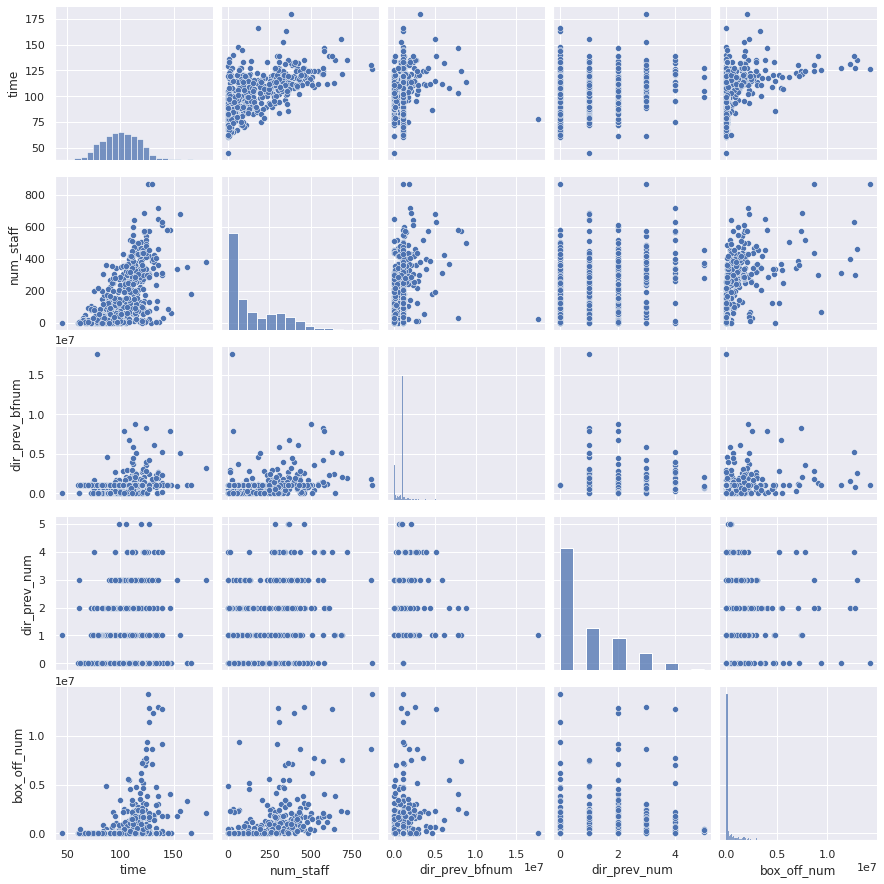

In [ ]:
sns.pairplot(df[["time","num_staff", "dir_prev_bfnum", 'dir_prev_num','box_off_num']])

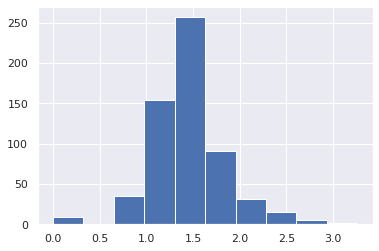

In [ ]:
np.log1p(df.num_actor).hist()

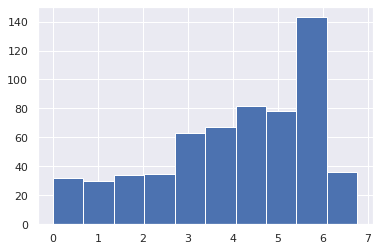

In [ ]:
np.log1p(df.num_staff).hist()

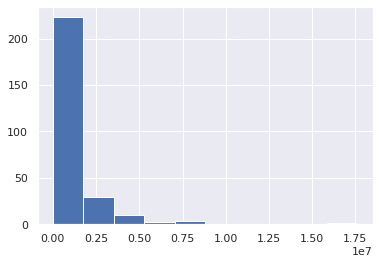

In [ ]:
df.dir_prev_bfnum.hist()

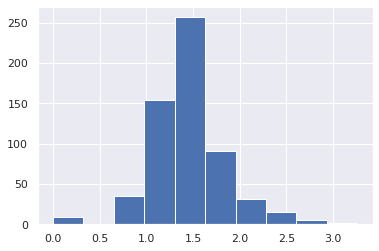

In [ ]:
np.log1p(df.num_actor).hist()

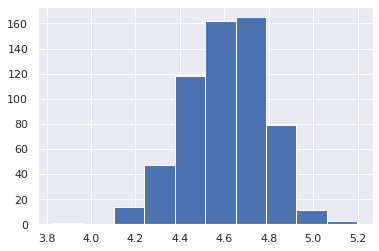

In [ ]:
np.log1p(df.time).hist()

#**최종 전처리 함수**

#####**preprocessing_data**

In [ ]:
#release time
def release_time(x):
  return str(x).split("-")

# release month : season categorical
# spring, summer, falling, winter
# def season(x):
#   if x in [3,4,5]:
#     return "spring"
#   elif x in [6,7,8]:
#     return "summer"
#   elif x in [9,10,11]:
#     return "falling"
#   elif x in [12,1,2]:
#     return "winter"



def season(x):
  if x in [3,4,5,9,10,11]:
    return "non-peak"
  else: 
    return "peak"

def preprocessing_data(data):
  df = data.copy()

  #dropping
  df.drop(["title","num_actor"], axis = 1, inplace = True)


  df["release_month"] = df["release_time"].map(lambda x : int(release_time(x)[1]))


  df["season"] = df["release_month"].map(lambda x : season(x))
  df.drop(["release_time","release_month"], axis =1, inplace = True)


  # bins = list(range(0,60, 5)) #5단위
  bins = [0,2,8,26,55] #세그룹으로 만들기
  # labels = list(range(1, len(bins))) # 구간 나누기
  labels = list(map(chr, range(ord("A")+len(bins)-2, ord("A")-1, -1)))
  distributors = list(df.distributor.unique())
  dis_counts = {}
  for dis in distributors:
    dis_counts[dis] = df.distributor.value_counts()[dis]


  df["distributor_counts"] = df["distributor"].map(lambda x : dis_counts[x])
  df["distributor_group"]  = pd.cut(df.distributor_counts, bins = bins, labels = labels)
  df.drop(["distributor", "distributor_counts"], axis = 1, inplace = True)



  #director : 제작 영화 개수 dir_movies_num : numerical or categorical?
  dir_list = list(df["director"].unique())
  dir_movie_num = {}
  for dir in dir_list:
    dir_movie_num[dir] = df["director"].value_counts()[dir]

  df["dir_movies_num"]  = df["director"].map(lambda x: dir_movie_num[x])
  df.drop("director", axis =1, inplace=  True)



  #일단 결측값 - median 채우기
  # df["dir_prev_bfnum"].fillna(df["dir_prev_bfnum"].median(), inplace=  True)
  df["dir_prev_bfnum"].fillna(0, inplace=  True)

  df_num = df.select_dtypes(include = ["float64", "int64"]).copy()
  df_cat = df.select_dtypes(include = ["object", "category"]).copy()
  col_num = list(df_num.columns)
  col_cat = list(df_cat.columns)

  print("raw data column : ", list(data.columns))
  print("numerical columns : ", col_num)
  print("categorical columns : ", col_cat)

  df_dummies = pd.get_dummies(df_cat, drop_first = True)

  

  return df_num, df_dummies

#####**preprocessing_data2**

In [ ]:
def release_time(x):
  return str(x).split("-")


def preprocessing_data2(data):
  df = data.copy()
  df.drop(["title", "director", "dir_prev_num", "dir_prev_bfnum"], axis = 1, inplace = True)

  df["release_month"] = df["release_time"].map(lambda x : int(release_time(x)[1]))
  df["release_year"] = df["release_time"].map(lambda x : int(release_time(x)[0]))
  df.drop("release_time", axis = 1, inplace= True)


  # bins = list(range(0,60, 5)) #5단위
  bins = [0,2,8,26,55] #세그룹으로 만들기
  # labels = list(range(1, len(bins))) # 구간 나누기
  labels = list(map(chr, range(ord("A")+len(bins)-2, ord("A")-1, -1)))
  distributors = list(df.distributor.unique())
  dis_counts = {}
  for dis in distributors:
    dis_counts[dis] = df.distributor.value_counts()[dis]


  df["distributor_counts"] = df["distributor"].map(lambda x : dis_counts[x])
  df["distributor_group"]  = pd.cut(df.distributor_counts, bins = bins, labels = labels)
  df.drop(["distributor", "distributor_counts"], axis = 1, inplace = True)

  df_num = df.select_dtypes(include = ["float64", "int64"]).copy()
  df_cat = df.select_dtypes(include = ["object", "category"]).copy()
  col_num = list(df_num.columns)
  col_cat = list(df_cat.columns)

  print("raw data column : ", list(data.columns))
  print("numerical columns : ", col_num)
  print("categorical columns : ", col_cat)

  df_dummies = pd.get_dummies(df_cat, drop_first = True)

  

  return df_num, df_dummies

####**preprocessing_data3**

In [ ]:
#release time
def release_time(x):
  return str(x).split("-")



def season(x):
  if x in [3,4,5,9,10,11]:
    return "non-peak"
  else: 
    return "peak"

def distributor(x, top5):
  if x in top5:
    return x 
  else:
    return "기타"

def preprocessing_data3(data):
  df = data.copy()

  

  #release time--> season(peak vs non peak)
  df["release_month"] = df["release_time"].map(lambda x : int(release_time(x)[1]))
  df["season"] = df["release_month"].map(lambda x : season(x))
  # df["relase_time"] = df["release_time"].map(lambda x : int("".join(release_time(x))))

  #distributor
  # top5 = list(df["distributor"].value_counts()[:5].index) #이렇게 하면 train과 test 전처리가 달라진다.
  top5 = ['CJ 엔터테인먼트', '롯데엔터테인먼트', '(주)NEW', '(주)마운틴픽쳐스', '(주)쇼박스']
  df["distributor"] = df["distributor"].map(lambda x: distributor(x, top5))
  

  #dir_prev_bfnum
  df["dir_prev_bfnum"].fillna(0, inplace=  True)

  #dir_prev_num : 데이터 안에서만 처리하는 거라서 원래 데이터 손상이 크다.
  #예를 들어 원래 데이터 수가 1개이면서 dir_prev_num이 0이 아닌 경우도 있다. 함수 돌리면 0으로 데이터를 바꾸게 된다.


  #dropping
  df.drop(["title"], axis = 1, inplace = True)
  df.drop(["release_time","release_month"], axis =1, inplace = True)
  df.drop("director", axis =1, inplace=  True)

  df_num = df.select_dtypes(include = ["float64", "int64"]).copy()
  df_cat = df.select_dtypes(include = ["object", "category"]).copy()
  col_num = list(df_num.columns)
  col_cat = list(df_cat.columns)

  print("raw data column : ", list(data.columns))
  print("numerical columns : ", col_num)
  print("categorical columns : ", col_cat)

  df_dummies = pd.get_dummies(df_cat, drop_first = True)

  

  return df_num, df_dummies

##**4.Model & Evaluation**

Model list

LinearRegression

Lasso

Ridge

Support Vector Regressor

Decision Tree Regressor

RandomForestRegressor

In [ ]:


def visualization(y_test, y_pred):
  

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)
  print("RMSE(Test) :", rmse)
  print("R2(Test) : ", r2)

  plt.figure(figsize =(6,4))
  plt.scatter(y_test, y_pred)
  plt.suptitle("y_test vs y_pred", fontsize = 14)

  plt.xlabel("y_test")
  plt.ylabel("y_pred")
  plt.show()


##**4.Model 형성 및 Evaluation**

###**모델 형성 및 cross validation + hyperparameter tuning + prediction**

**모델 학습 및 검증용 X_train, X_test, y_train, y_test from train.csv 파일**

In [ ]:
data_path = "/content/drive/Shareddrives/KUBIG 그룹과제/영화 관객수 데이터"
df = pd.read_csv(data_path + "/movies_train.csv")
y = df["box_off_num"].copy()
X = df.drop("box_off_num", axis = 1).copy()

num, dummies = preprocessing_data3(X)
X_total = pd.concat([num, dummies], axis = 1)


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_total, y, test_size = 0.2, random_state =42)

scaler = StandardScaler()
X_train[num.columns] = scaler.fit_transform(X_train[num.columns])
X_val[num.columns] = scaler.transform(X_val[num.columns])

X_train.columns == X_val.columns

raw data column :  ['title', 'distributor', 'genre', 'release_time', 'time', 'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
numerical columns :  ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
categorical columns :  ['distributor', 'genre', 'screening_rat', 'season']


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

#####**0.기본적인 regressor**



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

**LinearRegression**

Coefficients :  [  150748.43243854   192040.89243375   -63453.90205886   658600.42203494
    83942.73177896  -712091.87423981   571294.32524594   203700.93923805
  -877771.58632552  -771658.11918544 -1242104.77453432  -169349.54649368
  -665334.98797613  -902443.76315449  -828063.79341961  -697628.41471881
  -832986.85646303  -702599.87010149  -827556.77234199  -505034.45549597
  -680297.63595604    65467.16927269    -6937.16308032  -291891.03456157
   440140.03431249]
Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'distributor_(주)마운틴픽쳐스', 'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트',
       'distributor_기타', 'distributor_롯데엔터테인먼트', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'season_peak'],
      dtype='object')
RMSE :  1172370.4535595477
RMSE(

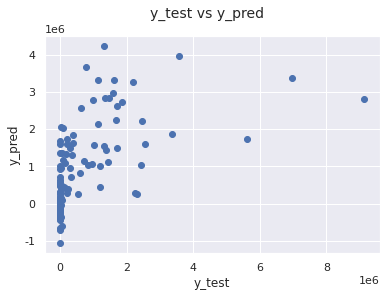

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions_lin = lin_reg.predict(X_val)

#결과:

print("Coefficients : ", lin_reg.coef_)
print(X_train.columns)
rsme = np.sqrt(mean_squared_error(y_val, predictions_lin))

visualization(y_val, predictions_lin)

**Lasso**

best estimator:  Lasso(alpha=10, random_state=42)
RMSE(Test) : 1172308.7379649698
R2(Test) :  0.22308546341239488


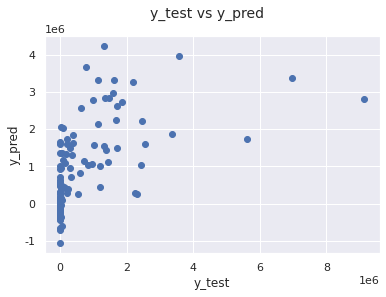

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state = 42)

params = {
    "alpha" : [1,2,3,4,5,6,7,8,9,10],
    
}
grid_lasso = GridSearchCV(lasso, param_grid = params, scoring = "neg_mean_squared_error", cv = 3, n_jobs= -1, refit = True)

grid_lasso.fit(X_train, y_train)
bm_lasso = grid_lasso.best_estimator_

bm_lasso.fit(X_train, y_train)
predictions_lasso = bm_lasso.predict(X_val)

print("best estimator: ", bm_lasso)
visualization(y_val, predictions_lasso)

**Ridge**

best estimator:  Ridge(alpha=10, random_state=42)
RMSE(Test) : 1160797.9367262803
R2(Test) :  0.23826747764788903


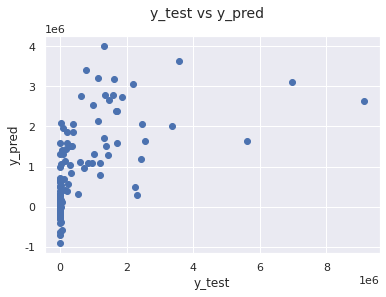

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state= 42)
params = {
    "alpha" : [1,2,3,4,5,6,7,8,9,10],
    
}
grid_ridge = GridSearchCV(ridge, param_grid = params, scoring = "neg_mean_squared_error", cv = 3, n_jobs= -1, refit = True)

grid_ridge.fit(X_train, y_train)
bm_ridge = grid_ridge.best_estimator_

bm_ridge.fit(X_train, y_train)
predictions_ridge = bm_ridge.predict(X_val)

print("best estimator: ", bm_ridge)
visualization(y_val, predictions_ridge)


**LinearSVR(X)**

best estimator:  LinearSVR(C=100.0, epsilon=5.0, random_state=42)
RMSE(Test) : 1458110.7754557845
R2(Test) :  -0.201905388217668


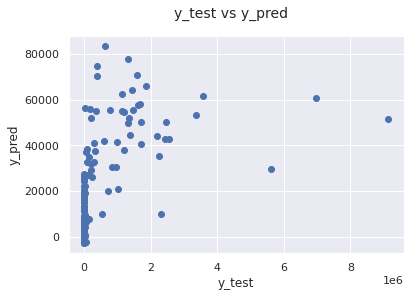

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(random_state = 42)
params = {
    "epsilon" : np.linspace(0, 5, 10),
    "C": np.linspace(0.01, 100, 10)}

grid_svr = GridSearchCV(svm_reg, param_grid = params, scoring = "neg_mean_squared_error", cv = 3, n_jobs = -1, refit = True)

grid_svr.fit(X_train, y_train)
bm_svr = grid_svr.best_estimator_
bm_svr.fit(X_train, y_train)
predictions_svr = bm_svr.predict(X_val)
print("best estimator: ", bm_svr)
visualization(y_val, predictions_svr)

######**1.RandomforestRegressor(Bagging) + RandomSearchCv(x)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

forest_reg = RandomForestRegressor(random_state = 42)






param_distribs = {"n_estimators"  : randint(low = 200, high = 1000) ,"max_features" : randint(low = 8, high = 11),
                  "max_depth" : randint(3, 20) }
                  
rndcv_rfr = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                           n_iter = 300, cv = 5, scoring = "neg_mean_squared_error", random_state = 42, n_jobs = -1,
                           refit = True)

rndcv_rfr.fit(X_train,y_train)
bm_rfr = rndcv_rfr.best_estimator_

bm_rfr.fit(X_train, y_train)
predictions = bm_rfr.predict(X_val)

#결과:
print("Best estimator:", bm_rfr)
print(bm_rfr.feature_importances_)
print(X_train.columns)
visualization(y_val, predictions)



KeyboardInterrupt: ignored

#####**1-2.RandomForestRegressor(Bagging) + GridSearchCV**

Best estimator: RandomForestRegressor(max_depth=5, max_features=8, n_estimators=500,
                      random_state=42)
[2.68045804e-01 1.14811188e-01 3.15802643e-02 2.87657897e-01
 6.12620317e-02 1.67325490e-03 1.90167747e-02 2.95333707e-02
 6.49154376e-02 6.51248432e-03 1.39204989e-03 1.28771148e-02
 5.65678747e-04 8.39527092e-03 3.94695925e-03 1.78619592e-04
 3.10700988e-03 1.41355554e-05 8.76762429e-05 1.17654000e-02
 1.18023618e-02 2.81323559e-02 1.49835132e-03 1.13851499e-02
 1.98433588e-02]
Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'distributor_(주)마운틴픽쳐스', 'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트',
       'distributor_기타', 'distributor_롯데엔터테인먼트', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'season_peak'],
      dtype='object')

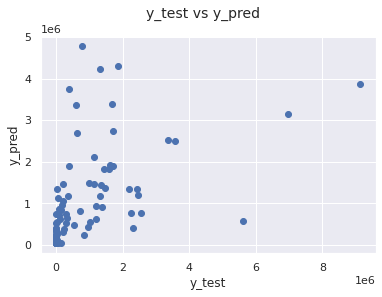

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor(random_state = 42)


param_distribs = {"n_estimators"  : np.arange( 200, 1000, 100) ,"max_features" : np.arange(8,11, 1),
                  "max_depth" : np.arange(5, 20,5) }
                  
gridcv_rfr = GridSearchCV(forest_reg, param_grid = param_distribs,cv = 5, scoring = "neg_mean_squared_error", n_jobs = -1, refit = True)
gridcv_rfr.fit(X_train, y_train)
bm_rfr_grid = gridcv_rfr.best_estimator_
predictions2 = bm_rfr_grid.predict(X_val)

#결과:
print("Best estimator:", bm_rfr_grid)
print(bm_rfr_grid.feature_importances_)
print(X_train.columns)
visualization(y_val, predictions2)


#####**1-3.RandomForestRegressor + without tuning**

Best estimator: RandomForestRegressor(random_state=42)
Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'distributor_(주)마운틴픽쳐스', 'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트',
       'distributor_기타', 'distributor_롯데엔터테인먼트', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'season_peak'],
      dtype='object')
RMSE(Test) : 1237190.6233491143
R2(Test) :  0.13470840946106621


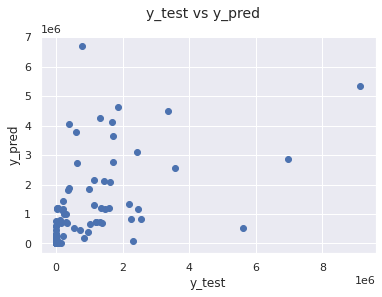

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
forest_reg = RandomForestRegressor(random_state = 42)
forest_reg.fit(X_train, y_train)
predictions3 = forest_reg.predict(X_val)

#결과:
print("Best estimator:", forest_reg)
print(X_train.columns)
visualization(y_val, predictions3)


#####**2.ExtraTreesRegressor + RandomSearchCV**

Best estimator: ExtraTreesRegressor(max_depth=5, max_features=8, n_estimators=537,
                    random_state=42)
[1.24674688e-01 5.63439061e-02 2.65358288e-02 2.58349680e-01
 3.30345641e-02 1.50269736e-02 5.40799657e-02 4.65827325e-02
 1.71746935e-01 1.26955267e-02 3.07188293e-03 2.64683762e-02
 1.55264078e-03 8.04354340e-03 5.94668899e-03 1.65956112e-06
 1.40980813e-03 2.27850964e-09 6.28003467e-04 1.36009043e-02
 9.77629931e-03 3.50281730e-02 3.44122616e-03 2.25990693e-02
 6.93609215e-02]
Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'distributor_(주)마운틴픽쳐스', 'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트',
       'distributor_기타', 'distributor_롯데엔터테인먼트', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'season_peak'],
      dtype='object')
RMS

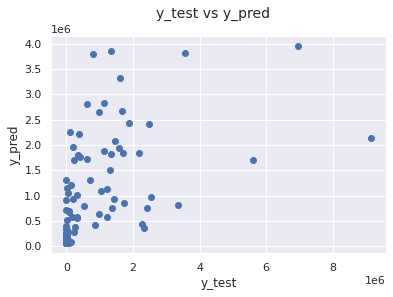

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

extratree = ExtraTreesRegressor(random_state = 42)

                  
param_distribs = {"n_estimators"  : randint(low = 200, high = 1000) ,"max_features" : randint(low = 8, high = 11),
                  "max_depth" : randint(3, 20) }
                  
rndcv_et = RandomizedSearchCV(extratree, param_distributions = param_distribs,
                           n_iter = 500, cv = 3, scoring = "neg_mean_squared_error", random_state = 42, n_jobs = -1,
                           refit = True)

rndcv_et.fit(X_train,y_train)
bm_et = rndcv_et.best_estimator_

bm_et.fit(X_train, y_train)
predictions4 = bm_et.predict(X_val)

#결과:
print("Best estimator:", bm_et)
print(bm_et.feature_importances_)
print(X_train.columns)
visualization(y_val, predictions4)


#####**2-2.ExtratreesRegressor + GridSearchCV**

Best estimator: ExtraTreesRegressor(max_depth=5, max_features=8, n_estimators=700,
                    random_state=42)
[1.19852963e-01 5.56400060e-02 2.70483575e-02 2.61012560e-01
 3.20761816e-02 1.56812034e-02 5.36458095e-02 4.50319091e-02
 1.75097740e-01 1.34692149e-02 2.96323968e-03 2.62316871e-02
 1.36917544e-03 7.85391229e-03 6.08606839e-03 1.27312046e-06
 1.44976135e-03 3.06076189e-09 6.14651901e-04 1.40543172e-02
 9.46745336e-03 3.61622542e-02 3.61339432e-03 2.15520213e-02
 7.00248413e-02]
Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'distributor_(주)마운틴픽쳐스', 'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트',
       'distributor_기타', 'distributor_롯데엔터테인먼트', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'season_peak'],
      dtype='object')
RMS

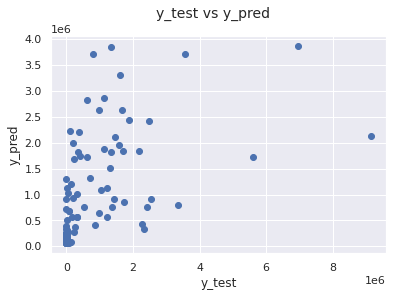

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

extratree = ExtraTreesRegressor(random_state = 42)

                  
param_distribs = {"n_estimators"  : np.arange( 200, 1000, 100) ,"max_features" : np.arange(8,11, 1),
                  "max_depth" : np.arange(5, 20,5) }
                  
gridcv_et = GridSearchCV(extratree, param_grid = param_distribs,cv = 5, scoring = "neg_mean_squared_error", n_jobs = -1, refit = True)

gridcv_et.fit(X_train,y_train)
bm_et_grid = gridcv_et.best_estimator_

bm_et_grid.fit(X_train, y_train)
predictions5 = bm_et_grid.predict(X_val)

#결과:
print("Best estimator:", bm_et_grid)
print(bm_et_grid.feature_importances_)
print(X_train.columns)
visualization(y_val, predictions5)

#####**3-3 ExtratreeRegressor +without tuning**

Best estimator: ExtraTreesRegressor(random_state=42)
[1.70194256e-01 6.29952014e-02 4.16611048e-02 2.23731862e-01
 6.09662618e-02 3.90555555e-03 1.85036325e-02 2.38942950e-02
 1.22545497e-01 2.93495695e-02 3.77535567e-03 1.70720483e-02
 7.92832761e-04 1.65433792e-02 1.57993692e-02 7.80955798e-08
 4.61020150e-03 4.63528147e-06 3.47545128e-04 2.26329395e-02
 2.53831139e-02 5.36331735e-02 1.89751850e-03 2.12668124e-02
 5.84937617e-02]
Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'distributor_(주)마운틴픽쳐스', 'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트',
       'distributor_기타', 'distributor_롯데엔터테인먼트', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'season_peak'],
      dtype='object')
RMSE(Test) : 1363674.9044718994
R2(Test) :  -0.05126193633244025


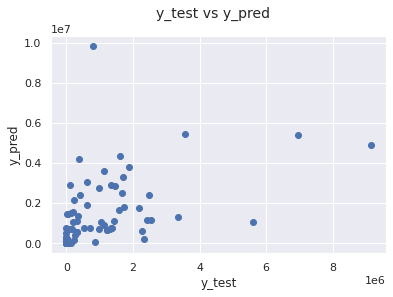

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

extratree = ExtraTreesRegressor(random_state = 42)

extratree.fit(X_train, y_train)
predictions6 = extratree.predict(X_val)

#결과:
print("Best estimator:", extratree )
print(extratree.feature_importances_)
print(X_train.columns)
visualization(y_val, predictions6)

#####**3.XGBRegressor + GridSearchCv**

[01:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best estimator: XGBRegressor(learning_rate=0.03, max_depth=5, random_state=42)
[0.10261516 0.03947077 0.05003221 0.14907059 0.07997153 0.
 0.01456574 0.01811187 0.09864555 0.0429633  0.00161034 0.01158345
 0.         0.03918982 0.0905758  0.         0.02486327 0.
 0.00282664 0.03648517 0.00784948 0.08023918 0.00950174 0.06902117
 0.0308072 ]
Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'distributor_(주)마운틴픽쳐스', 'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트',
       'distributor_기타', 'distributor_롯데엔터테인먼트', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_15세 관람가', 'sc

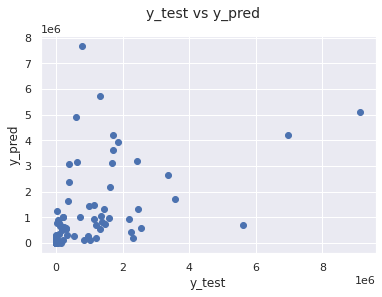

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)

params = {
              'learning_rate': [.03, 0.05, .07, 0.1, 0.5, 1.0], 
              'max_depth': [5, 6, 7,10],
              'n_estimators': [100,200,500,1000]}
                  
gridcv_xgb = GridSearchCV(xgb, param_grid = params,
                            cv = 3, scoring = "neg_mean_squared_error", n_jobs = -1,
                           refit = True)

gridcv_xgb.fit(X_train,y_train)
bm_xgb = gridcv_xgb.best_estimator_

bm_xgb.fit(X_train, y_train)
predictions7 = bm_xgb.predict(X_val)

#결과:
print("Best estimator:",bm_xgb)
print(bm_xgb.feature_importances_)
print(X_train.columns)
visualization(y_val, predictions7)

#####**4.Adaboost**

#####**5.CatBoostRegressor**

Learning rate set to 0.03646
0:	learn: 1903678.5293253	total: 47.6ms	remaining: 47.5s
1:	learn: 1878754.1728472	total: 50.1ms	remaining: 25s
2:	learn: 1854193.7621015	total: 52.4ms	remaining: 17.4s
3:	learn: 1826070.7749117	total: 60.5ms	remaining: 15.1s
4:	learn: 1803520.4137148	total: 61.4ms	remaining: 12.2s
5:	learn: 1781449.3241952	total: 62.3ms	remaining: 10.3s
6:	learn: 1761821.9490122	total: 63.1ms	remaining: 8.96s
7:	learn: 1742492.8316684	total: 68.8ms	remaining: 8.53s
8:	learn: 1722147.0049991	total: 69.7ms	remaining: 7.67s
9:	learn: 1701412.2729106	total: 70.5ms	remaining: 6.98s
10:	learn: 1683225.9626223	total: 71.4ms	remaining: 6.42s
11:	learn: 1665865.1840532	total: 72.2ms	remaining: 5.95s
12:	learn: 1650841.5330975	total: 78.2ms	remaining: 5.94s
13:	learn: 1634145.7757717	total: 79.1ms	remaining: 5.57s
14:	learn: 1615780.7443408	total: 80.5ms	remaining: 5.29s
15:	learn: 1599994.3055761	total: 81.6ms	remaining: 5.02s
16:	learn: 1583454.7312904	total: 82.5ms	remaining: 4.7

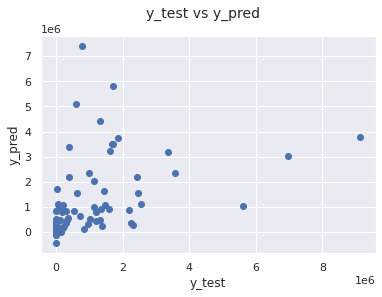

In [ ]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state = 42)

cat.fit(X_train, y_train)
predictions8 = cat.predict(X_val)


#결과:
print("Best estimator:",cat)
visualization(y_val, predictions8)




#####**5.Voting**

RMSE(Test) : 1106627.0817868991
R2(Test) :  0.30770398494258855


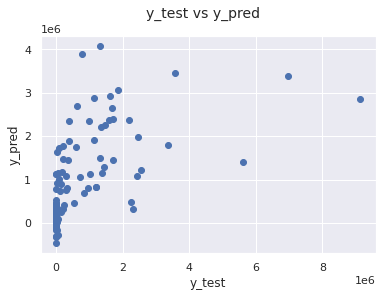

In [ ]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

estimators = [
              ("lasso", bm_lasso),
              ("ridge", bm_ridge),
              ("rfr", bm_rfr_grid),
              ("et", bm_et_grid),
              
              
]
# ("xbg", bm_xgb),
# ("cat", cat)
voting_reg = VotingRegressor(estimators)
voting_reg.fit(X_train, y_train)
predictions = voting_reg.predict(X_val)
visualization(y_val, predictions)

#####**6-1.Voting (예측값 평균값으로 확인)**

RMSE(Test) : 1106627.0817868991
R2(Test) :  0.30770398494258855


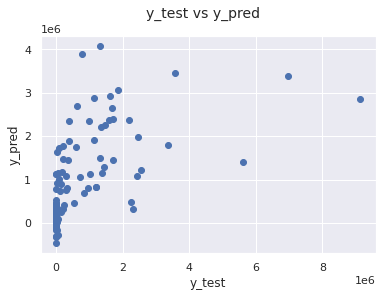

In [ ]:
#predictions2 : rfr_grid
#predictions5 : et_grid
#prediction7 : xgb_grid
#prediction8 : cat

predictions_avg = (predictions_lasso + predictions_ridge + predictions2 +predictions5) / 4
visualization(y_val, predictions_avg)

#####**6.Stacking**

RMSE(Test) : 1142044.1794293576
R2(Test) :  0.2626816326849344


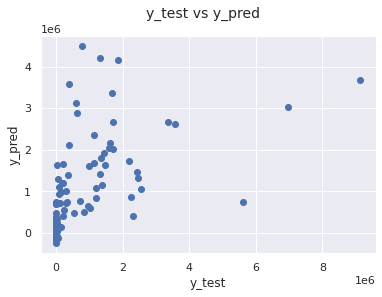

In [ ]:
from sklearn.ensemble import StackingRegressor

estimators = [
              ("lasso", bm_lasso),
              ("ridge", bm_ridge),
              ("rfr", bm_rfr_grid),
              ("et", bm_et_grid),
              
              
]
# ("xbg", bm_xgb),
# ("cat", cat)

stacking_reg = StackingRegressor(estimators = estimators, cv = 5)
stacking_reg.fit(X_train, y_train)
predictions = stacking_reg.predict(X_val)
visualization(y_val, predictions)

#최종 model 선택 후, test파일 예측, submission

**train**

In [ ]:
data_path = "/content/drive/Shareddrives/KUBIG 그룹과제/영화 관객수 데이터"
df = pd.read_csv(data_path + "/movies_train.csv")

y = df["box_off_num"].copy()
X = df.drop("box_off_num", axis = 1).copy()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_num, X_dummies = preprocessing_data3(X)

train = pd.concat([X_num, X_dummies], axis = 1)
train[X_num.columns] = scaler.fit_transform(train[X_num.columns])

raw data column :  ['title', 'distributor', 'genre', 'release_time', 'time', 'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
numerical columns :  ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
categorical columns :  ['distributor', 'genre', 'screening_rat', 'season']


raw data column :  ['title', 'distributor', 'genre', 'release_time', 'time', 'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num']
numerical columns :  ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num']
categorical columns :  ['distributor', 'genre', 'screening_rat', 'season']


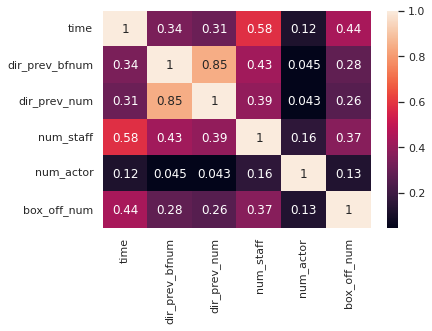

In [ ]:
#correlation check
check = df.copy()
check_num, check_dum = preprocessing_data3(check)
corr = check_num.corr()
sns.heatmap(corr, annot = True)

**test**

In [ ]:
df = pd.read_csv(data_path + "/movies_test.csv")
submission = df[["title"]].copy()
df_num, df_dummies = preprocessing_data3(df)
test = pd.concat([df_num, df_dummies], axis = 1)
test[df_num.columns] = scaler.transform(test[df_num.columns])

raw data column :  ['title', 'distributor', 'genre', 'release_time', 'time', 'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
numerical columns :  ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
categorical columns :  ['distributor', 'genre', 'screening_rat', 'season']


In [ ]:
#check data
print(train.isna().sum())
print(test.isna().sum())
print(train.columns == test.columns)

time                      0
dir_prev_bfnum            0
dir_prev_num              0
num_staff                 0
num_actor                 0
distributor_(주)마운틴픽쳐스     0
distributor_(주)쇼박스        0
distributor_CJ 엔터테인먼트     0
distributor_기타            0
distributor_롯데엔터테인먼트      0
genre_공포                  0
genre_느와르                 0
genre_다큐멘터리               0
genre_드라마                 0
genre_멜로/로맨스              0
genre_뮤지컬                 0
genre_미스터리                0
genre_서스펜스                0
genre_애니메이션               0
genre_액션                  0
genre_코미디                 0
screening_rat_15세 관람가     0
screening_rat_전체 관람가      0
screening_rat_청소년 관람불가    0
season_peak               0
dtype: int64
time                      0
dir_prev_bfnum            0
dir_prev_num              0
num_staff                 0
num_actor                 0
distributor_(주)마운틴픽쳐스     0
distributor_(주)쇼박스        0
distributor_CJ 엔터테인먼트     0
distributor_기타            0
distributor_롯데엔터테인먼트      0
genre_공

**최종 예측**

사실 train.csv 가지고 KFold로 Cross Validation하면서 모델 평가 해도 낫겟다 싶었다.

train_test_split은 test set이 한정되었다는게 한계. 전체 Kfold cross validation은 모든 일부분이 test가 될 수 있다는게 좋다

overfitting 방지(이후에 이 cross validation하면서 나온 것들의 평균값으로 예측값을 삼으면 됨) - **cross_val_predict**

이후에 그냥 모델들의 prediction들을 평균내자(결국 soft voting)

In [ ]:
#lasso

bm_lasso.fit(train, y)
pred_lasso = bm_lasso.predict(test)
submission["box_off_num"] = pred_lasso
print(submission.head())
path = "/content/drive/MyDrive/21년 겨울방학/KUBIG/머신러닝/과제/group"
submission.to_csv(path+"/submission(lasso).csv", index = False)

         title   box_off_num
0       용서는 없다  1.632218e+06
1  아빠가 여자를 좋아해  2.676178e+06
2          하모니  3.113187e+06
3          의형제  3.726672e+06
4        평행 이론  2.256169e+06


In [ ]:
#ridge

bm_ridge.fit(train, y)
pred_ridge = bm_ridge.predict(test)
submission["box_off_num"] = pred_ridge
print(submission.head())
path = "/content/drive/MyDrive/21년 겨울방학/KUBIG/머신러닝/과제/group"
submission.to_csv(path+"/submission(ridge).csv", index = False)

         title   box_off_num
0       용서는 없다  1.686223e+06
1  아빠가 여자를 좋아해  2.429816e+06
2          하모니  3.139193e+06
3          의형제  3.446367e+06
4        평행 이론  2.294449e+06


In [ ]:
#extratreeregressor + randomsearchcv
bm_et.fit(train, y)
pred_et_rcv = bm_et.predict(test)

submission["box_off_num"] = pred_et_rcv
print(submission.head())
path = "/content/drive/MyDrive/21년 겨울방학/KUBIG/머신러닝/과제/group"
submission.to_csv(path+"/submission(extratree).csv", index = False)

NameError: ignored

제출결과 : 1361616.3309717737	

In [ ]:
#extratreeregressor + gridsearchcv
bm_et_grid.fit(train, y)
pred_et_gridcv = bm_et_grid.predict(test)

submission["box_off_num"] = pred_et_gridcv
print(submission.head())
path = "/content/drive/MyDrive/21년 겨울방학/KUBIG/머신러닝/과제/group"
submission.to_csv(path+"/submission(extratree_grid).csv", index = False)

         title   box_off_num
0       용서는 없다  8.645207e+05
1  아빠가 여자를 좋아해  2.433744e+06
2          하모니  2.925681e+06
3          의형제  3.584155e+06
4        평행 이론  2.160293e+06


제출결과 : 	1364790.3746923425	

In [ ]:
#randomforestregressor + randomsearchcv
bm_rfr.fit(train, y)
pred_rfr_rcv = bm_rfr.predict(test)
submission["box_off_num"] = pred_rfr_rcv
print(submission.head())
path = "/content/drive/MyDrive/21년 겨울방학/KUBIG/머신러닝/과제/group"
submission.to_csv(path+"/submission(randomforest).csv", index = False)

         title   box_off_num
0       용서는 없다  1.886502e+06
1  아빠가 여자를 좋아해  1.442900e+06
2          하모니  1.941550e+06
3          의형제  1.963026e+06
4        평행 이론  1.412540e+06


제출결과 : 1337719.9523666622	

In [ ]:
#randomforestregressor + gridsearchcv
bm_rfr_grid.fit(train, y)
pred_rfr_gridcv = bm_rfr_grid.predict(test)
submission["box_off_num"] = pred_rfr_gridcv
print(submission.head())
path = "/content/drive/MyDrive/21년 겨울방학/KUBIG/머신러닝/과제/group"
submission.to_csv(path+"/submission(randomforest_grid).csv", index = False)


         title   box_off_num
0       용서는 없다  1.988781e+06
1  아빠가 여자를 좋아해  1.563994e+06
2          하모니  2.059406e+06
3          의형제  2.083137e+06
4        평행 이론  1.468113e+06


제출결과 : 1337678.2409521062	

In [ ]:
#voting
voting_reg.fit(train, y)
pred_voting = voting_reg.predict(test)
submission["box_off_num"] = pred_voting
print(submission.head())
path = "/content/drive/MyDrive/21년 겨울방학/KUBIG/머신러닝/과제/group"
submission.to_csv(path+"/submission(voting).csv", index = False)

         title   box_off_num
0       용서는 없다  1.542936e+06
1  아빠가 여자를 좋아해  2.275933e+06
2          하모니  2.809367e+06
3          의형제  3.210083e+06
4        평행 이론  2.044756e+06


제출결과 : 1574450.021932809	

In [ ]:
#voting(Average)
pred_avg = (pred_et_gridcv + pred_rfr_gridcv +  pred_lasso + pred_ridge) / 4
submission["box_off_num"] = pred_avg
print(submission.head())
path = "/content/drive/MyDrive/21년 겨울방학/KUBIG/머신러닝/과제/group"
submission.to_csv(path+"/submission(average).csv", index = False)

         title   box_off_num
0       용서는 없다  1.542936e+06
1  아빠가 여자를 좋아해  2.275933e+06
2          하모니  2.809367e+06
3          의형제  3.210083e+06
4        평행 이론  2.044756e+06


In [ ]:
#stacking
stacking_reg.fit(train, y)
pred_stacking = stacking_reg.predict(test)
submission["box_off_num"] = pred_stacking
print(submission.head())
path = "/content/drive/MyDrive/21년 겨울방학/KUBIG/머신러닝/과제/group"
submission.to_csv(path+"/submission(stacking).csv", index = False)

         title   box_off_num
0       용서는 없다  1.825142e+06
1  아빠가 여자를 좋아해  1.629834e+06
2          하모니  2.316082e+06
3          의형제  2.254126e+06
4        평행 이론  1.693917e+06


제출결과 : 1451807.6825038511	

발표내용
**각각 맡은 부분 ppt 제작 + 대본 (화요일 정오까지)**
1. 데이터 칼럼들 설명(개요_ ) -제윤 (1~2pt)
2. 데이터 칼럼 분포 + numerical vs categorical (EDA) - 명진 (선택한 칼럼만, 전처리를 위한 명분들)
3. 데이터 전처리 -> 함수(preprocessing_data3) - 지호(명분 --> 전처리방법)
4. 모델링 및 검증 - 윤석 (3~4pt) (모델 6개 결과 + 제일 좋은 모델의 이유?)
5. 실제제출 - 윤석(dacon)

**발표 점검  : 화요일 (오후 11:30)**

밑에서부터는 그냥 끄적이는거라 신경 안쓰셔도 됩니다!

#Prediction with Cross Validation

전체 train.csv를 cross validation 하면서 prediction

* lasso + grid
* ridge + grid
* rfr + grid
* et + grid


#####**preprocessing_data4**

전처리 놓친점... X들의 분포(skewed) : 로그변환 필요

y도 필요

cross validation의 사용법

In [ ]:
#release time
def release_time(x):
  return str(x).split("-")



def season(x):
  if x in [3,4,5,9,10,11]:
    return "non-peak"
  else: 
    return "peak"

def distributor(x, top5):
  if x in top5:
    return x 
  else:
    return "기타"

def preprocessing_data4(data):
  df = data.copy()

  

  #release time--> season(peak vs non peak)
  df["release_month"] = df["release_time"].map(lambda x : int(release_time(x)[1]))
  df["season"] = df["release_month"].map(lambda x : season(x))
  # df["relase_time"] = df["release_time"].map(lambda x : int("".join(release_time(x))))

  #distributor
  # top5 = list(df["distributor"].value_counts()[:5].index) #이렇게 하면 train과 test 전처리가 달라진다.
  top5 = ['CJ 엔터테인먼트', '롯데엔터테인먼트', '(주)NEW', '(주)마운틴픽쳐스', '(주)쇼박스']
  df["distributor"] = df["distributor"].map(lambda x: distributor(x, top5))
  

  #dir_prev_bfnum
  df["dir_prev_bfnum"].fillna(0, inplace=  True)

  #dir_prev_num : 데이터 안에서만 처리하는 거라서 원래 데이터 손상이 크다.
  #예를 들어 원래 데이터 수가 1개이면서 dir_prev_num이 0이 아닌 경우도 있다. 함수 돌리면 0으로 데이터를 바꾸게 된다.


  #dropping
  df.drop(["title"], axis = 1, inplace = True)
  df.drop(["release_time","release_month"], axis =1, inplace = True)
  df.drop("director", axis =1, inplace=  True)

  #log 변환 : 정규 분포로 만들기 위해
  df["num_actor"] = np.log1p(df.num_actor)
  df["num_staff"] = np.log1p(df.num_staff)
  


  df_num = df.select_dtypes(include = ["float64", "int64"]).copy()
  df_cat = df.select_dtypes(include = ["object", "category"]).copy()
  col_num = list(df_num.columns)
  col_cat = list(df_cat.columns)

  print("raw data column : ", list(data.columns))
  print("numerical columns : ", col_num)
  print("categorical columns : ", col_cat)

  df_dummies = pd.get_dummies(df_cat, drop_first = True)

  

  return df_num, df_dummies

In [ ]:
from sklearn.model_selection import KFold


def cv_prediction(model, train, y, test):
  rmse = []
  kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
  rmse = 0
  model_pred = np.zeros(test.shape[0])
  for train_idx, val_idx in kfold.split(train, y):
    
    train_x, train_y = train.iloc[train_idx], y[train_idx]
    val_x, val_y = train.iloc[val_idx], y[val_idx]

    
    model.fit(train_x, train_y)
    pred_cv = np.expm1([0 if x<0 else x for x in model.predict(val_x)])
    pred_test =  np.expm1([0 if x<0 else x for x in model.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y,pred_cv))
    #model 검증 rsme
    

    #실제 prediction
    model_pred += (pred_test / 5)
  print("RMSE: ", rmse)
  return model_pred

In [ ]:
#train
data_path = "/content/drive/Shareddrives/KUBIG 그룹과제/영화 관객수 데이터"
df = pd.read_csv(data_path + "/movies_train.csv")

y = df["box_off_num"].copy()
y = np.log1p(y)
X = df.drop("box_off_num", axis = 1).copy()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_num, X_dummies = preprocessing_data4(X)

train = pd.concat([X_num, X_dummies], axis = 1)
train[X_num.columns] = scaler.fit_transform(train[X_num.columns])

#test
df = pd.read_csv(data_path + "/movies_test.csv")
submission = df[["title"]].copy()
df_num, df_dummies = preprocessing_data4(df)
test = pd.concat([df_num, df_dummies], axis = 1)
test[df_num.columns] = scaler.transform(test[df_num.columns])

raw data column :  ['title', 'distributor', 'genre', 'release_time', 'time', 'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
numerical columns :  ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
categorical columns :  ['distributor', 'genre', 'screening_rat', 'season']
raw data column :  ['title', 'distributor', 'genre', 'release_time', 'time', 'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
numerical columns :  ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
categorical columns :  ['distributor', 'genre', 'screening_rat', 'season']


In [ ]:
#lasso
lasso_pred = cv_prediction(bm_lasso, train, y, test)
  
#ridge
ridge_pred = cv_prediction(bm_ridge, train, y, test)

#rfr_grid
rfr_grid_pred = cv_prediction(bm_rfr_grid, train, y, test)

#et_grid
et_grid_pred = cv_prediction(bm_et_grid, train, y, test)

# #cat
# cat_pred = cv_prediction(cat, train, y, test)



RMSE:  19010.593650020284
RMSE:  2001212.4618769682
RMSE:  581128.8954602329
RMSE:  405909.5261049093


In [ ]:
avg_pred = (rfr_grid_pred + et_grid_pred  )/ 2


In [ ]:
submission["box_off_num"] = lasso_pred
print(submission.head())
path = "/content/drive/MyDrive/21년 겨울방학/KUBIG/머신러닝/과제/group"
submission.to_csv(path+"/submission(lasso_0220).csv", index = False)

         title   box_off_num
0       용서는 없다  21055.944614
1  아빠가 여자를 좋아해  21055.944614
2          하모니  21055.944614
3          의형제  21055.944614
4        평행 이론  21055.944614


In [ ]:
submission["box_off_num"] = avg_pred
print(submission.head())
path = "/content/drive/MyDrive/21년 겨울방학/KUBIG/머신러닝/과제/group"
submission.to_csv(path+"/submission(avg_0220).csv", index = False)

         title   box_off_num
0       용서는 없다  4.035887e+05
1  아빠가 여자를 좋아해  1.012514e+06
2          하모니  1.183344e+06
3          의형제  1.472046e+06
4        평행 이론  6.348902e+05


In [ ]:
#파생변수 
# 경상이익
# 총자산순이익률
# 유동비율
# 부채이뷸
# 당좌비율
# 영업이익/영업이익률
# 고정자산 회전율
# 자기자본 이익률
# 부채비율